In [ ]:
import sys
import numpy as np
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
from seaborn._core.properties import Color

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" )

Python 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Pandas 1.4.4
NumPy 1.22.4
Matplotlib 3.7.1
Seaborn 0.12.2


# 1. การนำเข้าข้อมูล

In [ ]:
#ข้อมูล Total Population
Tpop = pd.read_csv('/content/Population.total.csv')
#ข้อมูล Male Population
Mpop = pd.read_csv('/content/Population.male.csv')
#ข้อมูล Female Population
Fpop = pd.read_csv('/content/Population.female.csv')
#ข้อมูล Birth Rate
Brate = pd.read_csv('/content/Birth.rate.csv')
#ข้อมูล Death Rate
Drate = pd.read_csv('/content/Death.rate.csv')
#ข้อมูล Land Area
Land = pd.read_csv('/content/Land.area.csv')
#ข้อมูล Life Expectancy
Life = pd.read_csv('/content/Life.expectancy.csv')
#ข้อมูล Country Region
Ccode = pd.read_csv('/content/country.csv')


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# 2. Data Cleaning and Preparation.

In [ ]:
# นำ Total Population มากลับตาราง
year_list = list(Tpop.iloc[:, 4:].columns)
df = pd.melt(Tpop,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='population')
df.rename({'variable': 'Year'}, axis=1, inplace=True)

In [ ]:
# เพิ่มคำอธิบาย region
df=pd.merge(df,Ccode,left_on='Country Name',right_on='Country Name',how='left')
df.rename({'Country Code_x': 'Country Code'}, axis=1, inplace=True)
df=df.drop(columns=['Country Code_y'])

In [ ]:
# Male Population 
year_list = list(Mpop.iloc[:, 4:].columns)
Mpop1 = pd.melt(Mpop,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Male')
Mpop1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Male มาต่อท้าย
Mpop2=Mpop1[['Male']]
df = pd.concat([df,Mpop2],ignore_index=False,axis=1)

In [ ]:
# Female Population 
year_list = list(Fpop.iloc[:, 4:].columns)
Fpop1 = pd.melt(Fpop,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Female')
Fpop1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Female มาต่อท้าย
Fpop2=Fpop1[['Female']]
df = pd.concat([df,Fpop2],ignore_index=False,axis=1)

In [ ]:
# Birth Rate 
year_list = list(Brate.iloc[:, 4:].columns)
Brate1 = pd.melt(Brate,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Birth Rate')
Brate1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Birth Rate มาต่อท้าย
Brate2=Brate1[['Birth Rate']]
df = pd.concat([df,Brate2],ignore_index=False,axis=1)

In [ ]:
# Death Rate 
year_list = list(Drate.iloc[:, 4:].columns)
Drate1 = pd.melt(Drate,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Death Rate')
Drate1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Death Rate มาต่อท้าย
Drate2=Drate1[['Death Rate']]
df = pd.concat([df,Drate2],ignore_index=False,axis=1)

In [ ]:
# Land area  
year_list = list(Land.iloc[:, 4:].columns)
Land1 = pd.melt(Land,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Land')
Land1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Land มาต่อท้าย
Land2=Land1[['Land']]
df = pd.concat([df,Land2],ignore_index=False,axis=1)

In [ ]:
# Life expectancy 
year_list = list(Life.iloc[:, 4:].columns)
Life1 = pd.melt(Life,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Life')
Life1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Land มาต่อท้าย
Life2=Life1[['Life']]
df = pd.concat([df,Life2],ignore_index=False,axis=1)

In [ ]:
# เรียง column
from pandas.core.internals.array_manager import new_block
df[df.isna().any(axis=1)]
new_cols =["Region","Continent","Country Code","Country Name","Indicator Name","Year","population","Male","Female","Birth Rate","Death Rate","Land","Life"]
df=df.reindex(columns=new_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16492 entries, 0 to 16491
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          13330 non-null  object 
 1   Continent       13330 non-null  object 
 2   Country Code    16492 non-null  object 
 3   Country Name    16492 non-null  object 
 4   Indicator Name  16492 non-null  object 
 5   Year            16492 non-null  object 
 6   population      16400 non-null  float64
 7   Male            16400 non-null  float64
 8   Female          16400 non-null  float64
 9   Birth Rate      15458 non-null  float64
 10  Death Rate      15434 non-null  float64
 11  Land            15608 non-null  float64
 12  Life            15204 non-null  float64
dtypes: float64(7), object(6)
memory usage: 1.8+ MB


In [ ]:
#สำรวจค่า Nan
df.isna().sum()

Region            3162
Continent         3162
Country Code         0
Country Name         0
Indicator Name       0
Year                 0
population          92
Male                92
Female              92
Birth Rate        1034
Death Rate        1058
Land               884
Life              1288
dtype: int64

In [ ]:
# Handling  with null data
df['Death Rate'].fillna(df['Death Rate'].median(),inplace=True)
df['Birth Rate'].fillna(method='ffill',inplace=True)
df['Land'].fillna(method = 'ffill', inplace = True)
df['Land'].fillna(df.groupby('Country Code')['Land'].transform('median'), inplace = True)
df['Life'].fillna(df.groupby('Country Code')['Life'].transform('median'), inplace = True)
df.drop(['Indicator Name'],axis=1)
df=df[df["Year"].str.contains('2021')== False]
df['area_cap'] =df['population']/df['Land']
df.head(10)


,Region,Continent,Country Code,Country Name,Indicator Name,Year,population,Male,Female,Birth Rate,Death Rate,Land,Life,area_cap
0,Caribbean,North America,ABW,Aruba,"Population, total",1960,54608.0,26834.0,27773.0,33.883000,6.594000,180.0,64.152000,303.377778
1,NaN,NaN,AFE,Africa Eastern and Southern,"Population, total",1960,130692579.0,64839355.0,65853220.0,47.438554,20.918108,14571611.0,44.085552,8.968986
2,Southern Asia,Asia,AFG,Afghanistan,"Population, total",1960,8622466.0,4476521.0,4145945.0,50.340000,31.921000,652230.0,32.535000,13.219978
3,NaN,NaN,AFW,Africa Western and Central,"Population, total",1960,97256290.0,48453387.0,48802898.0,47.325476,26.363067,9045780.0,37.845152,10.751565
4,Middle Africa,Africa,AGO,Angola,"Population, total",1960,5357195.0,2686966.0,2670229.0,51.026000,26.659000,1246700.0,38.211000,4.297100
5,Southern Europe,Europe,ALB,Albania,"Population, total",1960,1608800.0,823752.0,785048.0,41.068000,16.681000,27400.0,54.439000,58.715328
6,Southern Europe,Europe,AND,Andorra,"Population, total",1960,9443.0,4773.0,4670.0,41.068000,9.259051,470.0,NaN,20.091489
7,NaN,NaN,ARB,Arab World,"Population, total",1960,93359407.0,47000663.0,46358744.0,47.609965,21.183258,13611411.0,44.972899,6.858907
8,Western Asia,Asia,ARE,United Arab Emirates,"Population, total",1960,133426.0,81077.0,52349.0,41.814000,15.546000,71020.0,48.811000,1.878710
9,South America,South America,ARG,Argentina,"Population, total",1960,20349744.0,10191482.0,10158262.0,23.784000,8.844000,2736690.0,63.978000,7.435897


In [ ]:
# พบว่ายังมีค่า Nan อยู่จึง drop ทิ้งทั้ง row
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12719 entries, 0 to 16225
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          12719 non-null  object 
 1   Continent       12719 non-null  object 
 2   Country Code    12719 non-null  object 
 3   Country Name    12719 non-null  object 
 4   Indicator Name  12719 non-null  object 
 5   Year            12719 non-null  object 
 6   population      12719 non-null  float64
 7   Male            12719 non-null  float64
 8   Female          12719 non-null  float64
 9   Birth Rate      12719 non-null  float64
 10  Death Rate      12719 non-null  float64
 11  Land            12719 non-null  float64
 12  Life            12719 non-null  float64
 13  area_cap        12719 non-null  float64
dtypes: float64(8), object(6)
memory usage: 1.5+ MB


# 3. Exploratory data

##3.1 Population

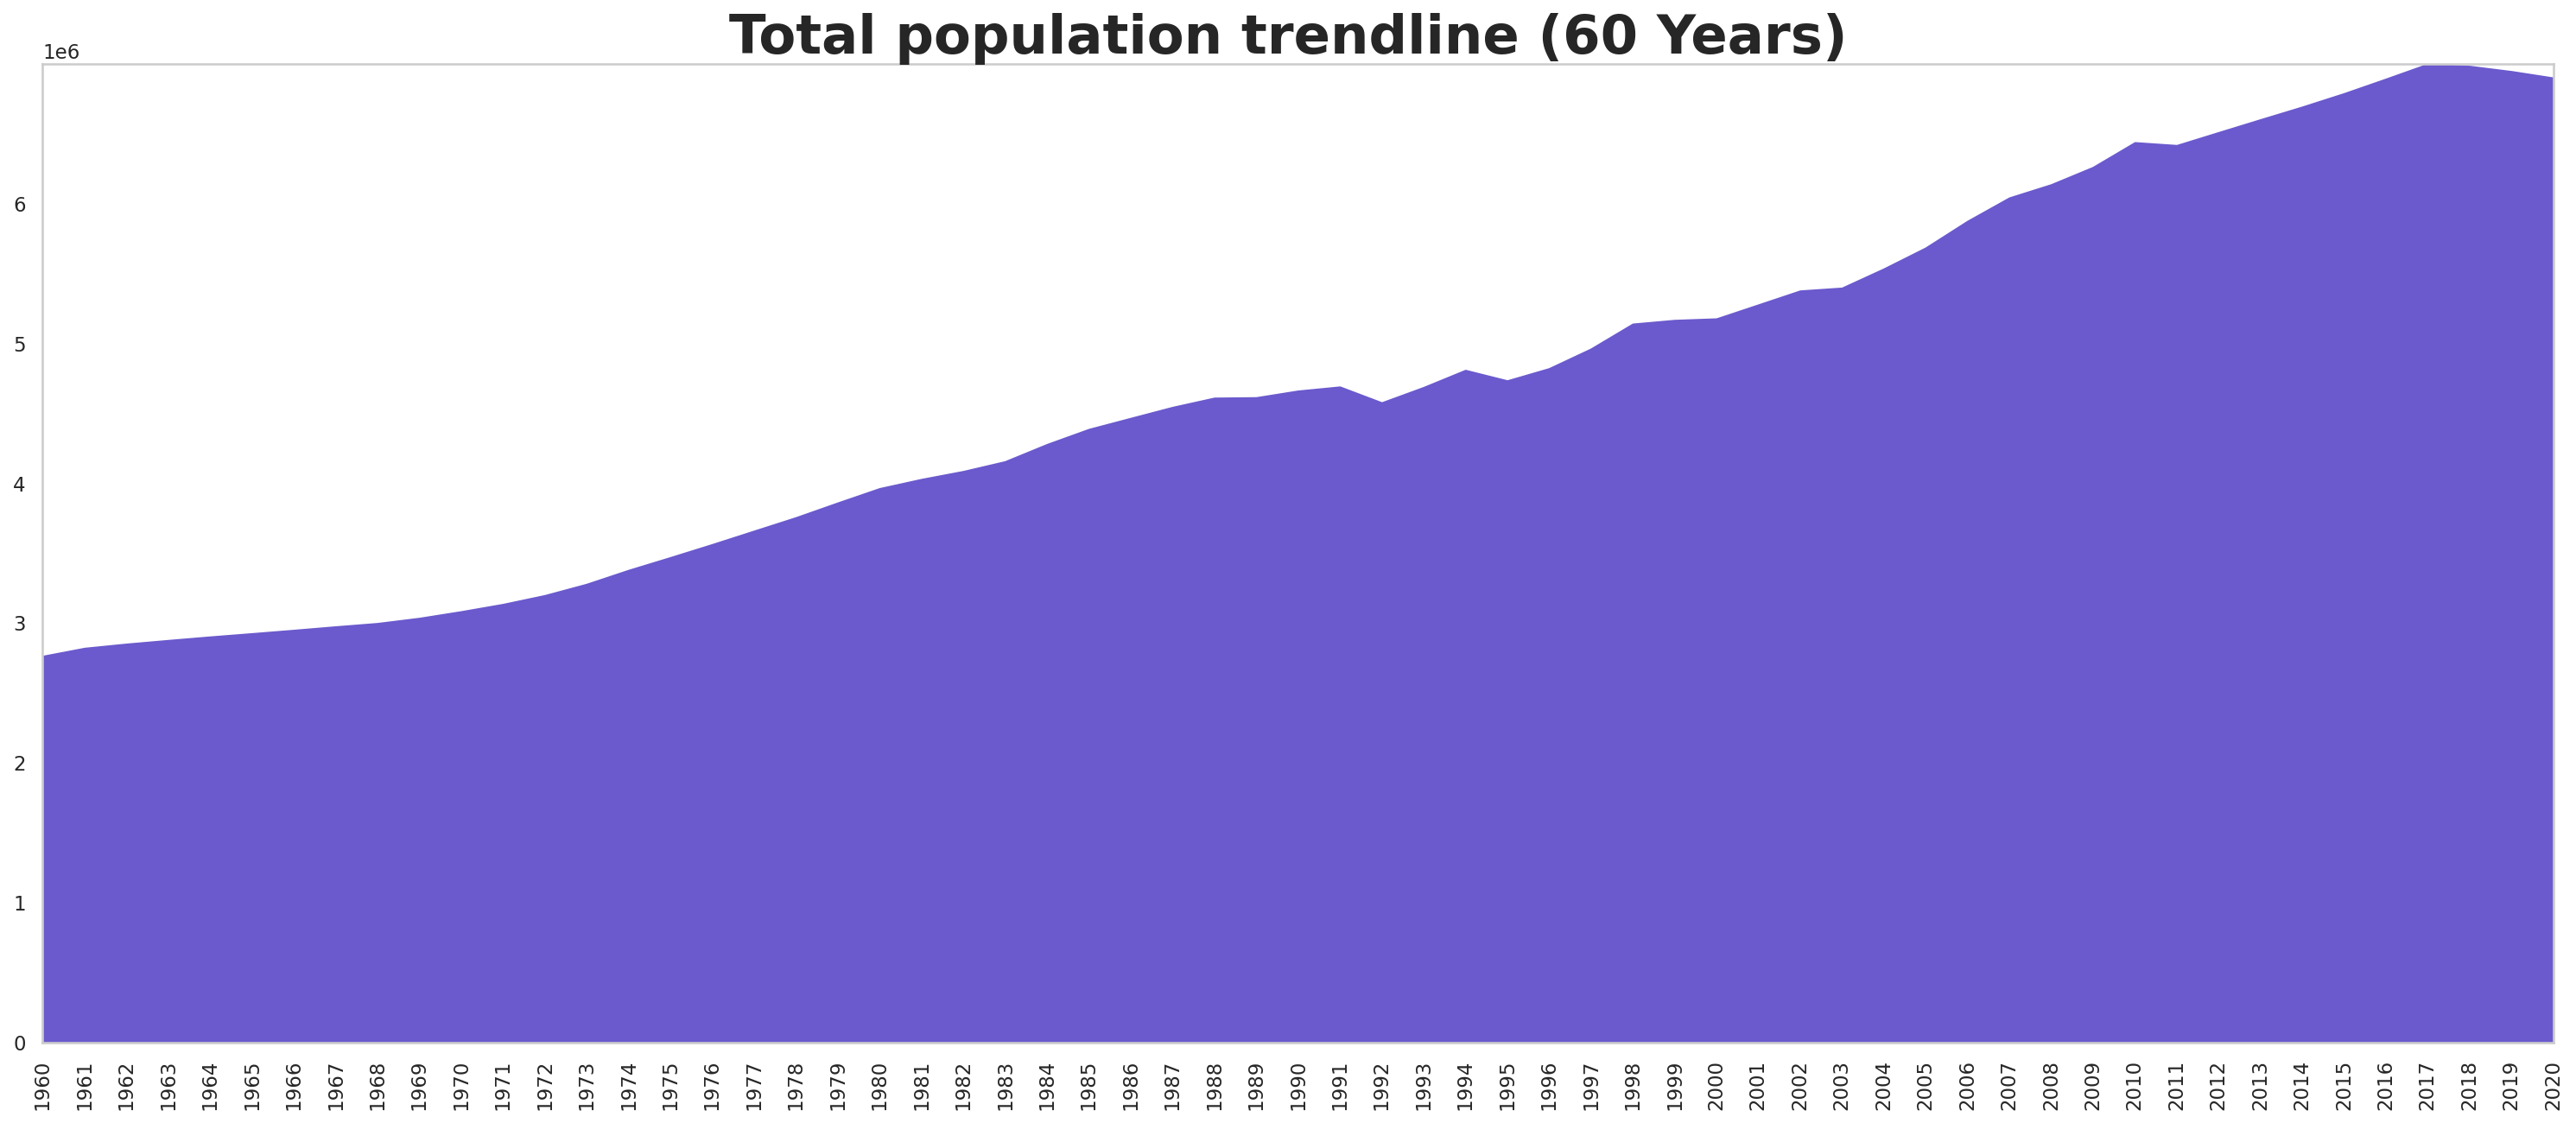

In [ ]:
# ภาพรวม Population
totalp = df.pivot_table(index='Year',columns=None,values=['population'],aggfunc=['median'])

type(totalp)
c=palette=sns.color_palette("cubehelix")
plt.figure(figsize=(25, 10))
plt.xticks(rotation=90)

tyear = totalp.index
tpop =totalp.iloc[:,0] 
plt.fill_between(tyear,tpop,color='slateblue')
plt.title("Total population trendline (60 Years) ",fontsize = 30,fontweight="bold")
plt.margins(0,0) 

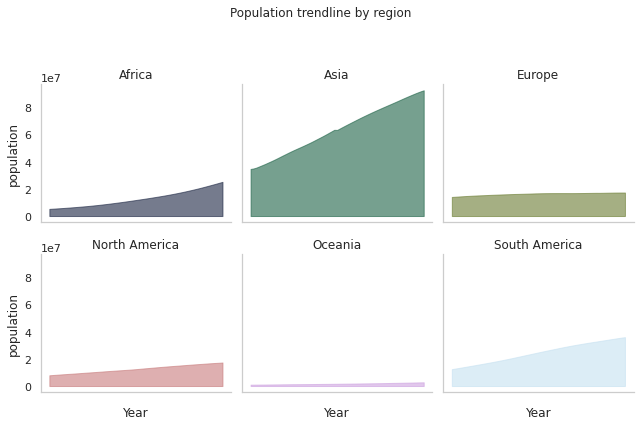

In [ ]:
# Population by Region
b = df.pivot_table(index=['Year','Continent'],columns=None,values=['population'],aggfunc=['mean'])
type(b)

df2 = b.reset_index()
df2.columns = ['Year','Continent','population']

g = sns.FacetGrid(df2, col='Continent',hue='Continent',col_wrap=3,palette=sns.color_palette("cubehelix"))
g.set(xticklabels=[])
g.tick_params(bottom=False)

g = g.map(plt.fill_between, 'Year', 'population',alpha=0.6).set_titles("{col_name} Continent")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.80)
g = g.fig.suptitle('Population trendline by region')

sns.set_style("whitegrid", {'axes.grid' : False})

##3.2 Birth Rate

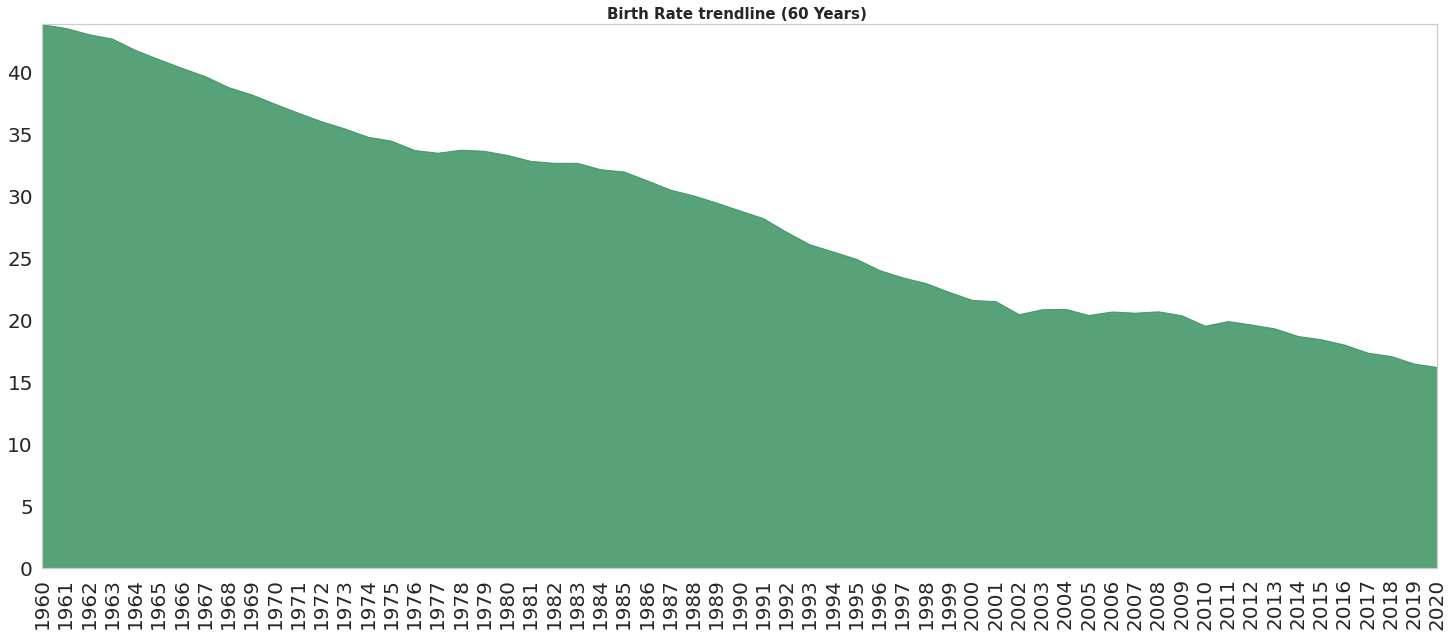

In [ ]:
# ภาพรวม Birth Rate
btotal = df.pivot_table(index='Year',columns=None,values=['Birth Rate'],aggfunc=['median'])
type(btotal)

c=palette=sns.color_palette("cubehelix")
plt.figure(figsize=(25, 10))
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)

tyear = btotal.index
btotal =btotal.iloc[:,0] 
plt.fill_between(tyear,btotal,color='seagreen',alpha=0.8)
plt.title("Birth Rate trendline (60 Years) ",fontsize = 15,fontweight="bold")
plt.margins(0,0)
plt.savefig("Birth Rate.jpg",dpi=150)

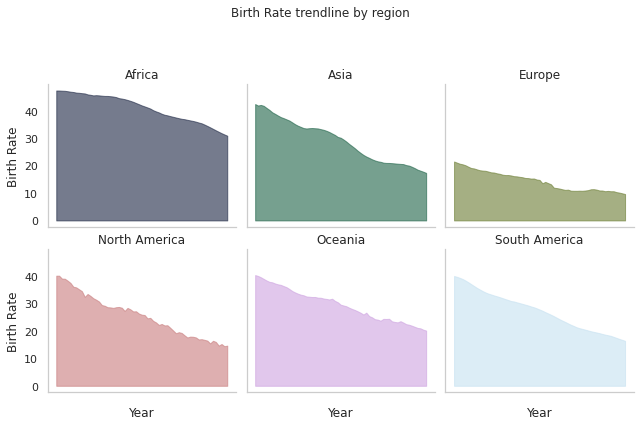

In [ ]:
# Birth Rate by Region
b = df.pivot_table(index=['Year','Continent'],columns=None,values=['Birth Rate'],aggfunc=['mean'])
type(b)

df2 = b.reset_index()
df2.columns = ['Year','Continent','Birth Rate']

g = sns.FacetGrid(df2, col='Continent',hue='Continent',col_wrap=3,palette=sns.color_palette("cubehelix"))
g.set(xticklabels=[])
g.tick_params(bottom=False)

g = g.map(plt.fill_between, 'Year', 'Birth Rate',alpha=0.6).set_titles("{col_name} Continent")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.80)
g = g.fig.suptitle('Birth Rate trendline by region')

sns.set_style("whitegrid", {'axes.grid' : False})

##3.3 Death Rate

In [ ]:
# ภาพรวม Death Rate
totalp = df.pivot_table(index='Year',columns=None,values=['Death Rate'],aggfunc=['median'])

type(totalp)
c=palette=sns.color_palette("cubehelix")
plt.figure(figsize=(25, 10))
plt.xticks(rotation=90)

tyear = totalp.index
tpop =totalp.iloc[:,0] 
plt.fill_between(tyear,tpop,color='darksalmon')
plt.title(" Death Rate trendline (60 Years) ",fontsize = 30,fontweight="bold")
plt.margins(0,0)

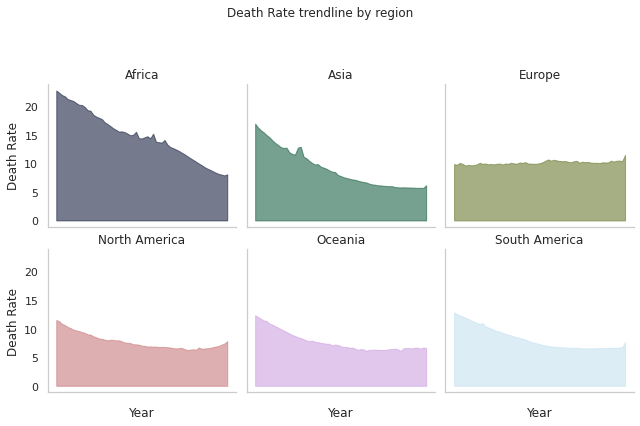

In [ ]:
# Death Rate by Region
b = df.pivot_table(index=['Year','Continent'],columns=None,values=['Death Rate'],aggfunc=['mean'])
type(b)

df2 = b.reset_index()
df2.columns = ['Year','Continent','Death Rate']

g = sns.FacetGrid(df2, col='Continent',hue='Continent',col_wrap=3,palette=sns.color_palette("cubehelix"))
g.set(xticklabels=[])
g.tick_params(bottom=False)

g = g.map(plt.fill_between, 'Year', 'Death Rate',alpha=0.6).set_titles("{col_name} Continent")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.80)
g = g.fig.suptitle('Death Rate trendline by region')

sns.set_style("whitegrid", {'axes.grid' : False})

##3.4 Birth Rate and Death Rate Ratio

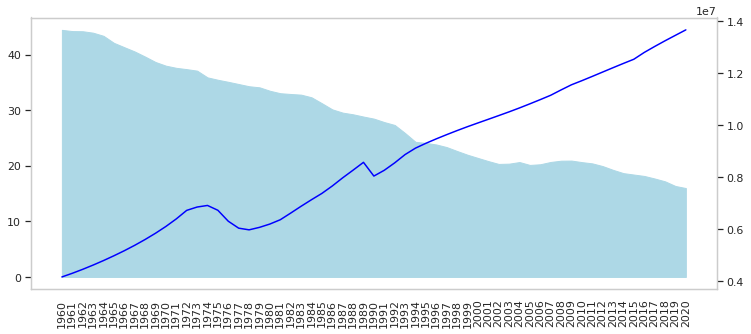

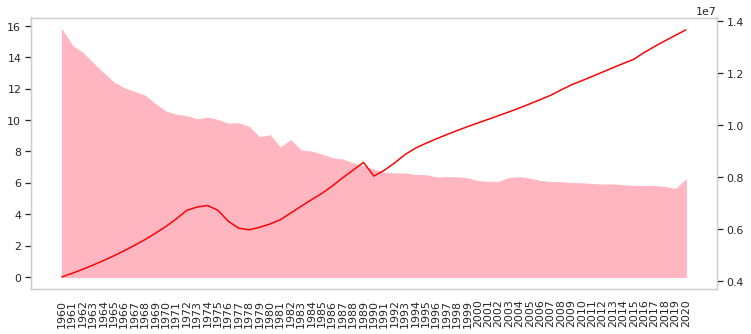

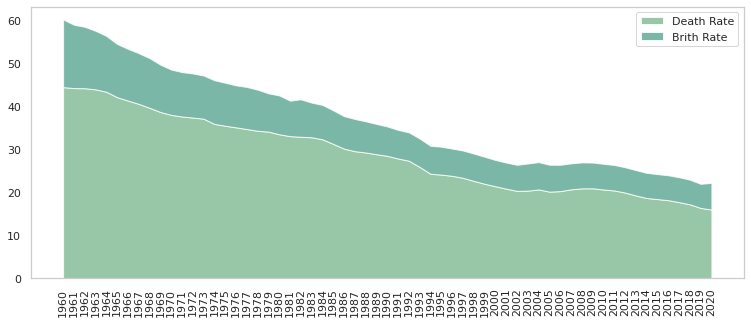

In [ ]:
#brithrate Death Rate
df_pivot5 = df[df.Continent=='Asia'].pivot_table(index='Year',columns=None,values=['population','Birth Rate'],aggfunc=['median'])


type(df_pivot5)
c=palette=sns.color_palette("crest")



xyear_asia = df_pivot5.index
xyear_asia

yb1_asia =df_pivot5.iloc[:,0] # Deathrate
yb2_asia =df_pivot5.iloc[:,1] # Population 

fig, b1 = plt.subplots(figsize=(12.3, 5))
plt.xticks(rotation=90)
b2 = b1.twinx()



b1.fill_between(xyear_asia, yb1_asia,color = 'lightblue')
b2.plot(xyear_asia, yb2_asia,color = "blue")

b1.grid(False)
b2.grid(False)


#Deadrate Death Rate
df_pivot6 = df[df.Continent=='Asia'].pivot_table(index='Year',columns=None,values=['population','Death Rate'],aggfunc=['median'])
type(df_pivot6)


xyear_asia = df_pivot6.index
xyear_asia

yd1_asia =df_pivot6.iloc[:,0] # Deathrate
yp2_asia =df_pivot6.iloc[:,1] # Population 

fig, d1 = plt.subplots(figsize=(12.3, 5))
plt.xticks(rotation=90)
d2 = d1.twinx()



d1.fill_between(xyear_asia, yd1_asia,color = 'lightpink')
d2.plot(xyear_asia, yp2_asia,color = "red")

d1.grid(False)
d2.grid(False)



#B Vs D
df_pivot7 = df[df.Continent=='Asia'].pivot_table(index='Year',columns=None,values=['Death Rate','Birth Rate'],aggfunc=['median'])
type(df_pivot7)


xyear_asia = df_pivot7.index
xyear_asia

yd1_asia =df_pivot7.iloc[:,0] # Deathrate
yb1_asia =df_pivot7.iloc[:,1] # Bthrate 
plt.grid(False)

plt.figure(figsize=(12.78, 5))
plt.xticks(rotation=90)

pal = ["blue", "pink",]
plt.stackplot(xyear_asia,yd1_asia, yb1_asia, labels=['Death Rate','Brith Rate '], colors=c, alpha=0.8 )
plt.legend(loc='upper right')
plt.show()




(1.0, 100.0)

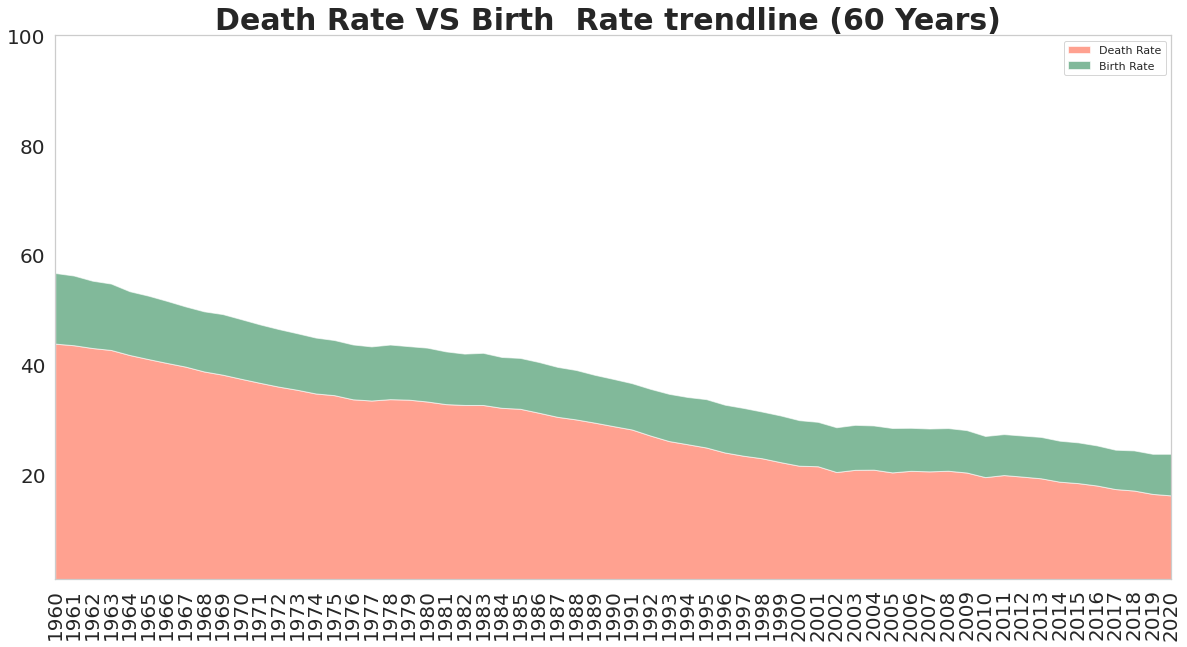

In [ ]:


#B Vs D
df_pivot13 = df.pivot_table(index='Year',columns=None,values=['Death Rate','Birth Rate'],aggfunc=['median'])
type(df_pivot13)


xyear_asia = df_pivot13.index
xyear_asia


b=df_pivot13.iloc[:,0] # Deathrate
d=df_pivot13.iloc[:,1] # Brithrate 

plt.figure(figsize=(20 ,10))
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.margins(0,0) 

pal = ["tomato", "seagreen",]
nal = ["alpha=0.5","alpha=0.70"]
plt.stackplot(xyear_asia,b,d, labels=['Death Rate','Birth Rate '], colors=pal, alpha=0.6 )
plt.legend(loc='upper right')
plt.title("Death Rate VS Birth  Rate trendline (60 Years) ",fontsize = 30,fontweight="bold")
plt.savefig("Death Rate VS Birth Rate.jpg",dpi=300)
plt.ylim(1, 100)

##3.5 Average Life Expectancy

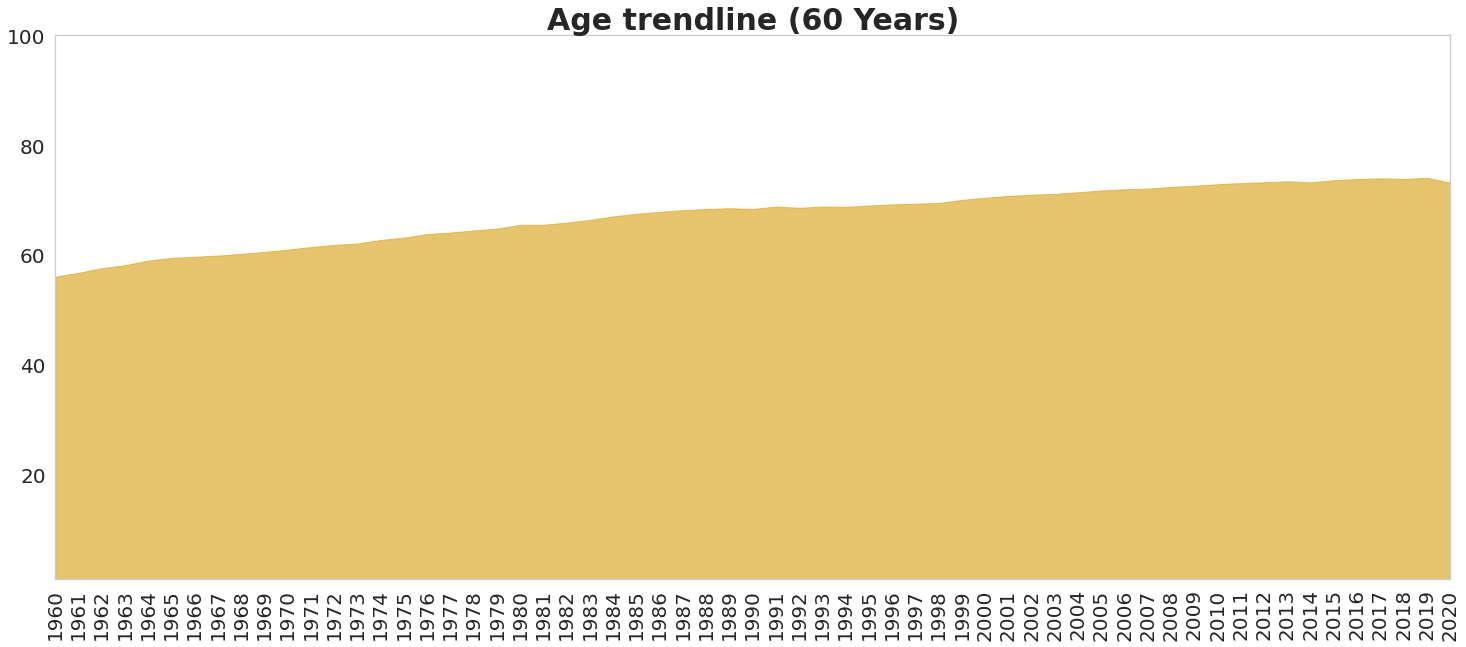

In [ ]:

## ภาพรวมอายุ
btotal = df.pivot_table(index='Year',columns=None,values=['Life'],aggfunc=['median'])


type(btotal)
c=palette=sns.color_palette("cubehelix")
plt.figure(figsize=(25, 10))
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)

plt.margins(0,0) 

tyear = btotal.index
btotal =btotal.iloc[:,0] #popluation
plt.fill_between(tyear,btotal,color='goldenrod',alpha=0.65)
plt.title("Age trendline (60 Years)",fontsize = 30,fontweight="bold")
plt.margins(0,0) 
plt.ylim(1, 100)
plt.savefig("Age Rate.jpg",dpi=300)

,Country Name,Birth Rate,Life
0,Cayman Islands,19.052672,82.190244
1,Liechtenstein,13.872131,81.133427
2,Bermuda,22.650279,78.960554
3,Faroe Islands,16.234426,78.871172
4,Iceland,17.673770,78.179258
5,Japan,12.120000,78.010892
6,Sweden,12.416393,77.845010
7,Switzerland,12.526230,77.665282
8,Norway,13.696721,77.428477
9,Curacao,18.299066,77.415914


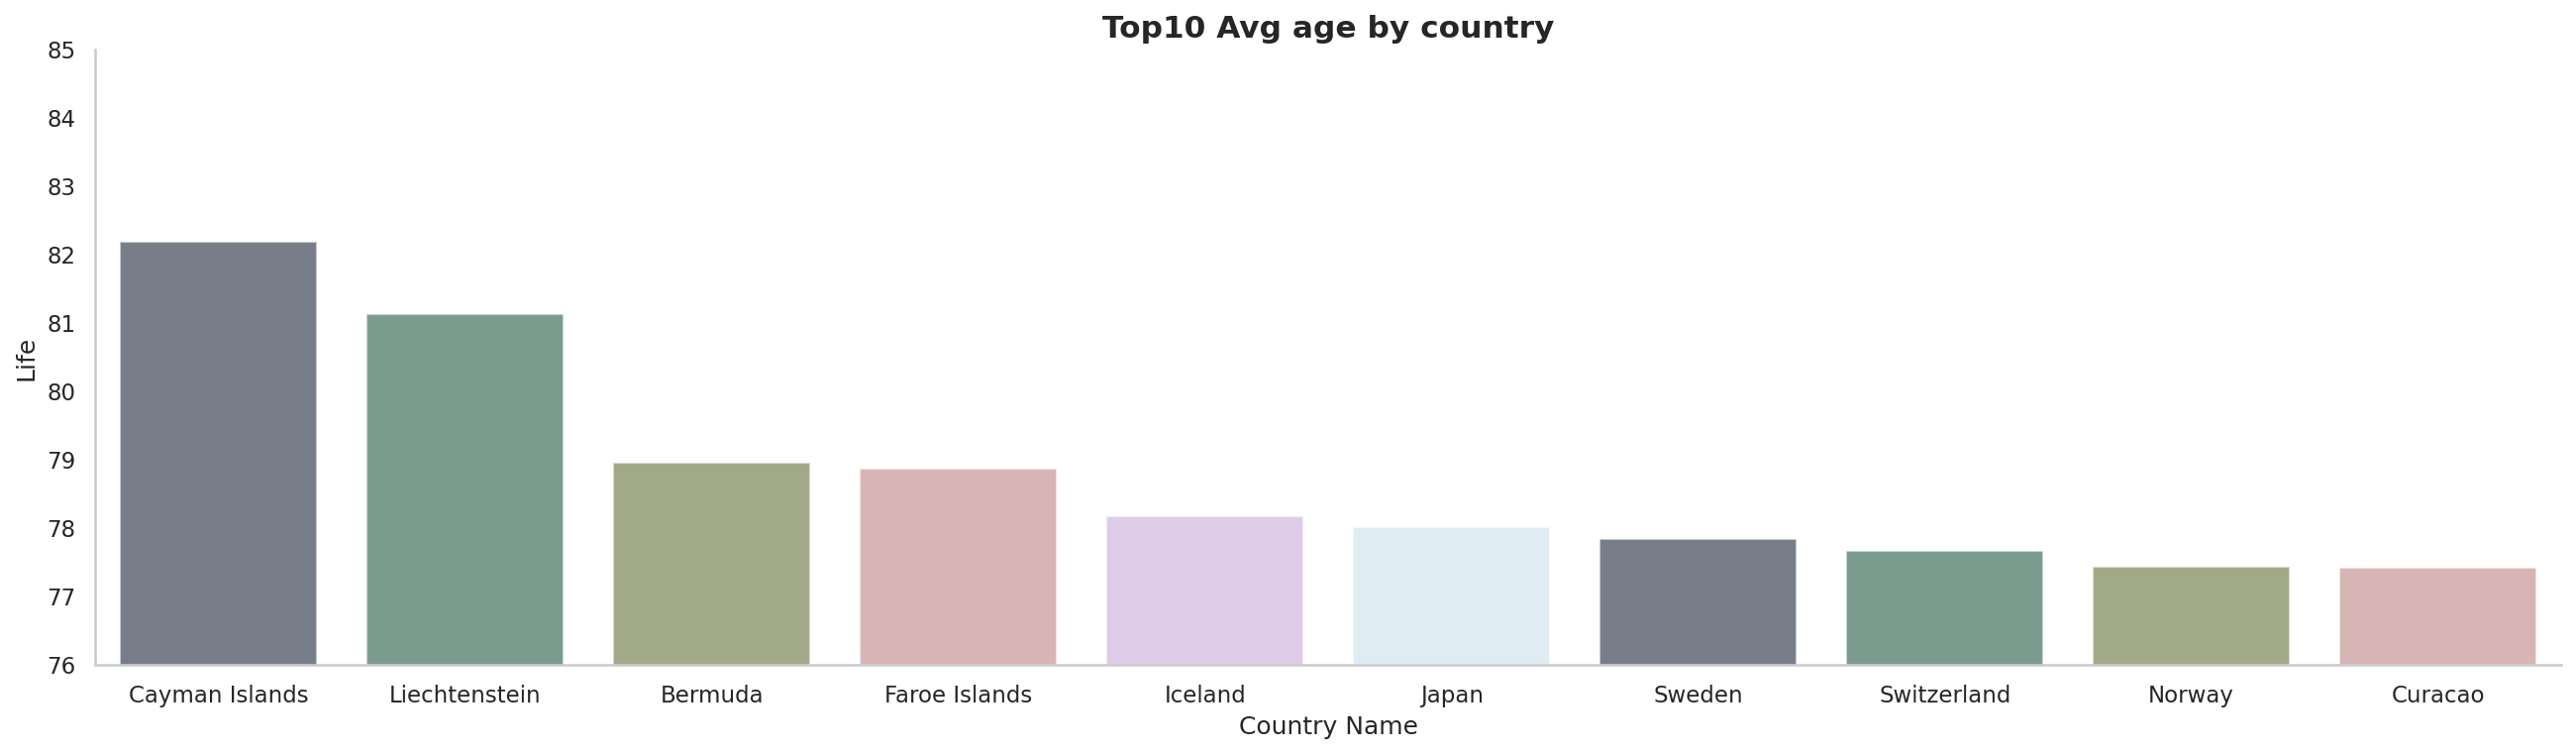

In [ ]:
#ประเทศ 10 อันดับแรก
df2=df.pivot_table(index='Country Name',columns=None,values=['Birth Rate','Life'],aggfunc='mean').sort_values('Life',ascending=False).reset_index()
df22 = df2.iloc[0:10]
sns.set(rc={'figure.dpi':150})

sns.set_style("whitegrid", {'axes.grid' : False})
sns.catplot( kind='bar',
             data=df22,
             x='Country Name',             # Axis to show the categories
             y='Life',     # Quantitative values
             height=5, aspect=3.5,
             alpha=0.6,palette=sns.color_palette("cubehelix"))
plt.ylim(76, 85)
plt.title("Top10 Avg age by country",fontsize=15,fontweight="bold")

plt.savefig("avg age.jpg",dpi=300)
df22

,Country Name,Birth Rate,Life
0,South Sudan,48.074836,38.840967
1,Mali,47.901377,45.124787
2,Sierra Leone,44.125180,45.157738
3,Chad,48.659869,45.379443
4,Niger,53.392869,45.748967
5,Nigeria,44.241361,45.856311
6,Malawi,47.313984,46.181820
7,Timor-Leste,38.472459,46.209197
8,Angola,48.544623,46.430279
9,Mozambique,44.726557,46.982197


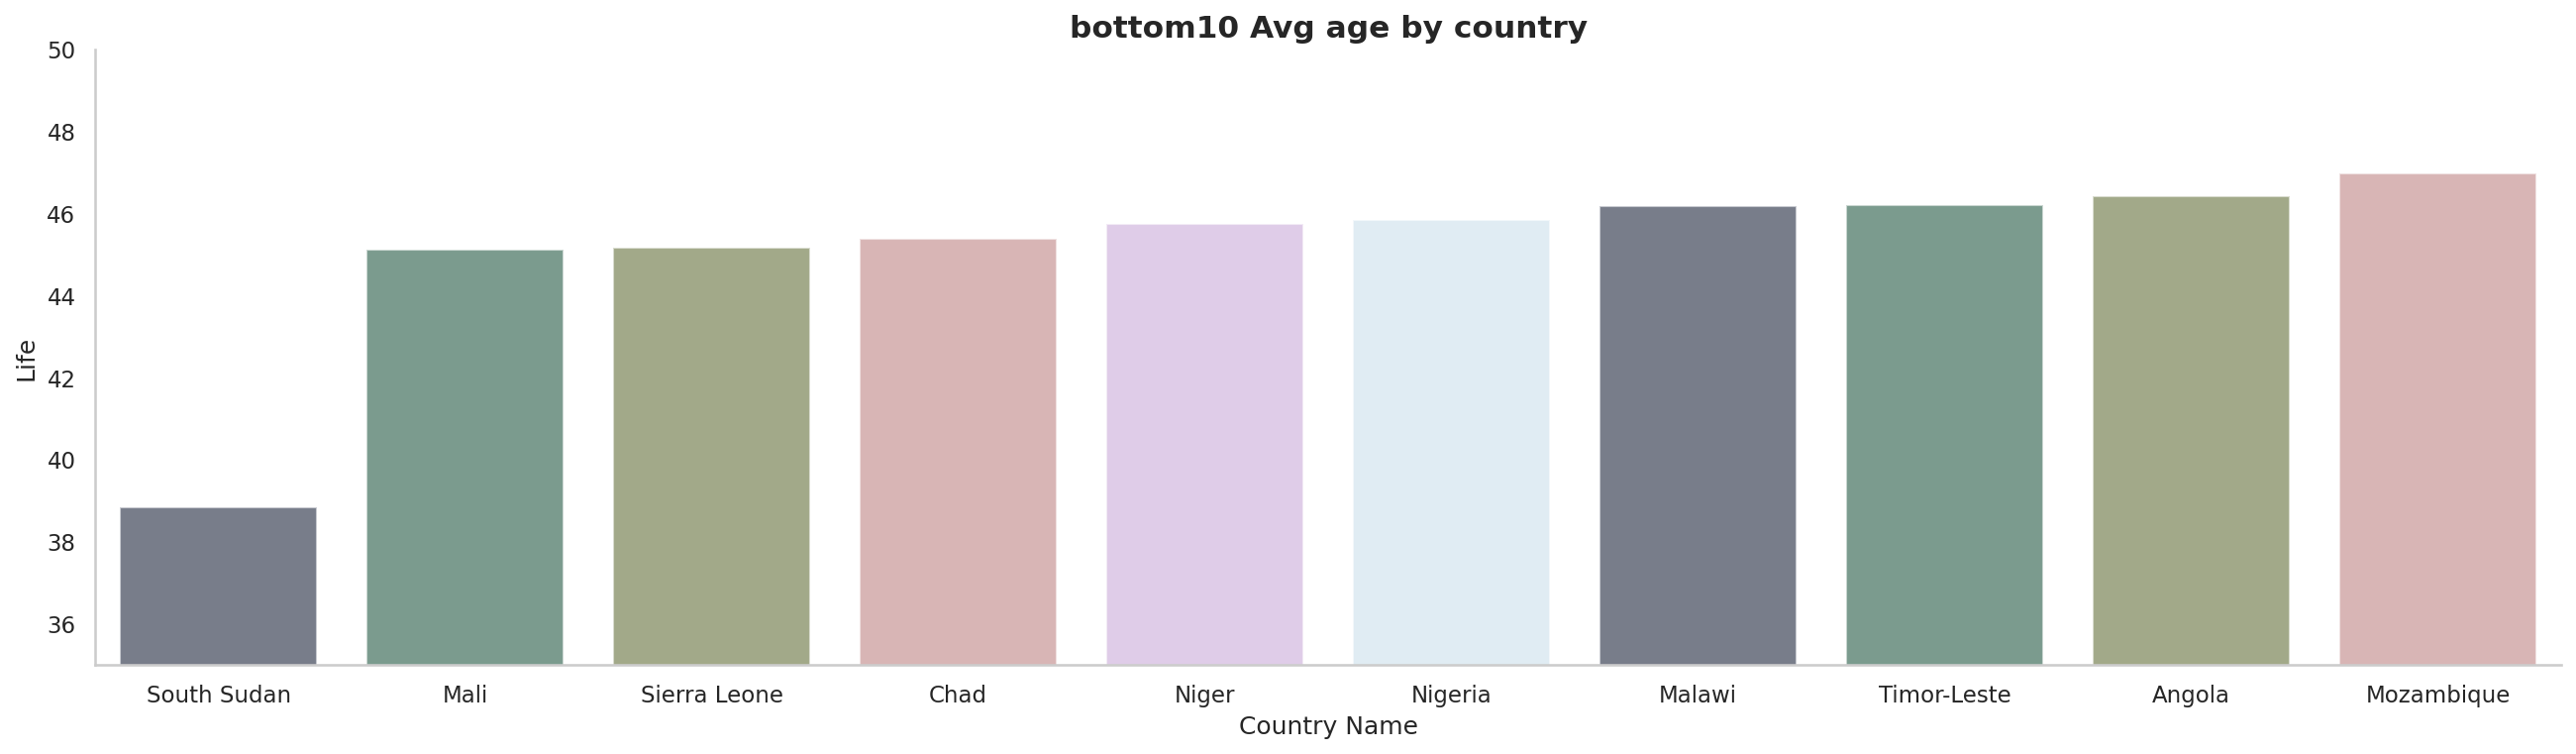

In [ ]:
#ประเทศ 10 อันดับสุดท้าย 
df3=df.pivot_table(index='Country Name',columns=None,values=['Birth Rate','Life'],aggfunc='mean').sort_values('Life',ascending=True).reset_index()
df33 = df3.iloc[0:10]
sns.set(rc={'figure.dpi':150})

sns.set_style("whitegrid", {'axes.grid' : False})
sns.catplot( kind='bar',
             data=df33,
             x='Country Name',             # Axis to show the categories
             y='Life',     # Quantitative values
             height=5, aspect=3.5,
             alpha=0.6,palette=sns.color_palette("cubehelix"))
plt.ylim(35,50 )
plt.title("bottom10 Avg age by country",fontsize=15,fontweight="bold")

plt.savefig("avg age low.jpg",dpi=300)
df33

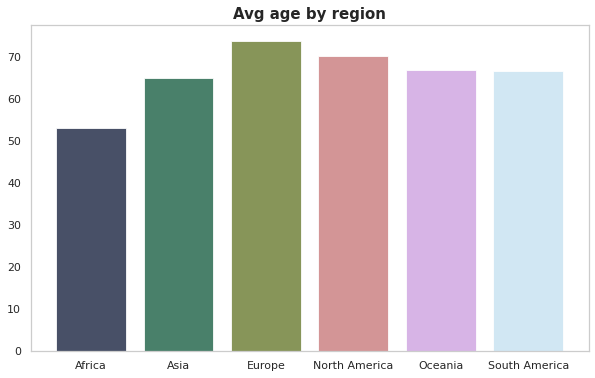

In [ ]:
#ภูมิภาค 
df_pivot =df.pivot_table(index='Continent',columns=None,values=['Life'],aggfunc=['mean'])

type(df_pivot)
Continent= df_pivot.index
c=palette=sns.color_palette("cubehelix")

total_pop=df_pivot.iloc[:,0] # population 

plt.figure(figsize=(10,6))
plt.bar(Continent,total_pop,color=c,alpha=0.8)
plt.title("Avg age by region",fontsize=15,fontweight="bold")
plt.savefig(" Bar Age Rate by region.jpg",dpi=300)

##3.6 gender proportion

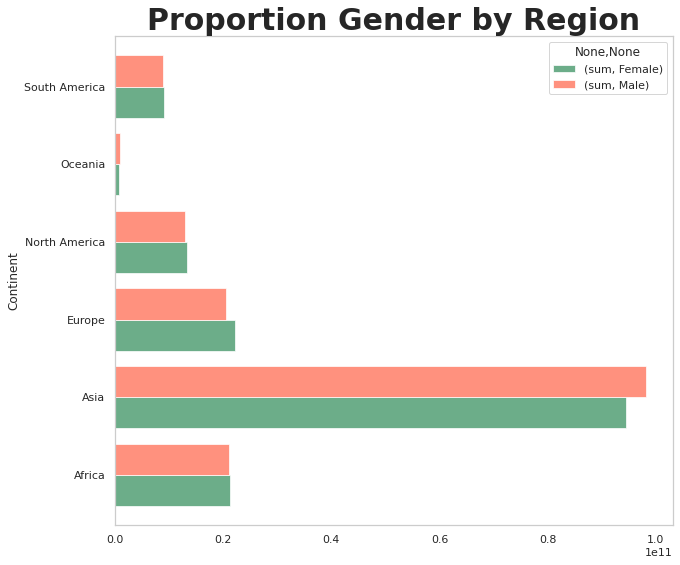

In [ ]:
sex = df.pivot_table(index='Continent',columns=None,values=['Male','Female'],aggfunc=['sum'])
sex
type(sex)
pal = ["seagreen", "tomato",]
c=palette=sns.color_palette("cubehelix")
sex.plot.barh(figsize=(10,9),color=pal,title = "Proportion Gender by Region",alpha=0.7,width = 0.8,)
plt.title("Proportion Gender by Region",fontsize=30,fontweight="bold")
#fontsize=15,fontweight="bold"
plt.savefig(" mf Bar agender Rate by region.jpg",dpi=300)

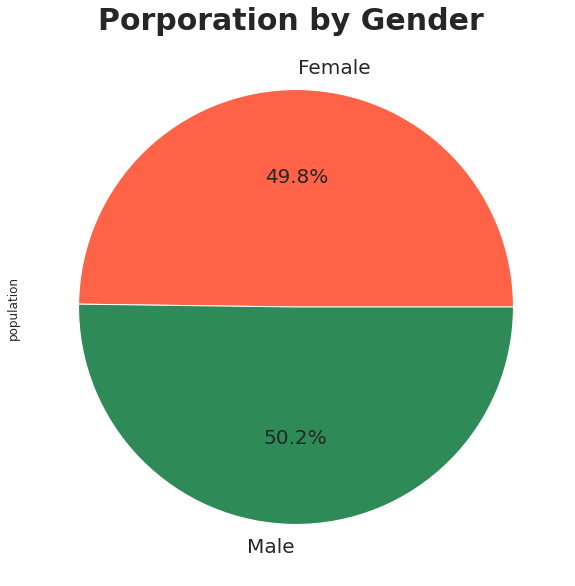

<Figure size 1800x720 with 0 Axes>

In [ ]:

male =df['Male'].sum()
female = df['Female'].sum()


df4 = pd.DataFrame([['Male',male],['Female',female]],columns=('Gender', 'population'))
type(df4)
colors1 = ['tomato','seagreen']
plt.figure(figsize=(25, 10))
palette = {"Female":"tab:pink",
           "male":"tab:royalblue"}

data = df4.groupby("Gender")["population"].sum()
data.plot.pie(autopct="%.1f%%",colors=colors1,fontsize=20)
plt.title("Porporation by Gender ",fontsize=30,fontweight="bold")
plt.figure(figsize=(25, 10))
plt.savefig("Pie Gender.jpg",dpi=300)
plt.show()

##3.7 Scatter plot

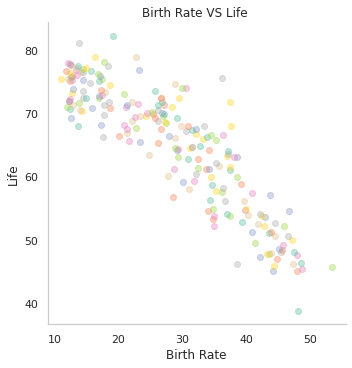

In [ ]:
df33=df.pivot_table(index='Country Name',columns=None,values=['Birth Rate','Death Rate','Life'],aggfunc='mean').sort_values('Life',ascending=True).reset_index()
sns.lmplot( data=df33,
            x='Birth Rate', y='Life',
            hue='Country Name',
            markers="o",  
            palette="Set2",       
            scatter_kws=dict(alpha=0.4),  
            line_kws=dict(alpha=0.6),     
            legend=False
        ).set(title='Birth Rate VS Life ')
        

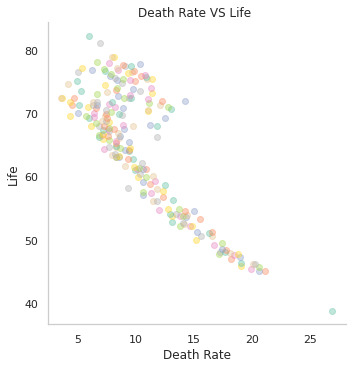

In [ ]:
df33=df.pivot_table(index='Country Name',columns=None,values=['Birth Rate','Death Rate','Life'],aggfunc='mean').sort_values('Life',ascending=True).reset_index()
sns.lmplot( data=df33,
            x='Death Rate', y='Life',
            hue='Country Name',
            markers="o",   # Set markers for each hue color
            palette="Set2",       # Colors to use for the different levels of the hue variable
            scatter_kws=dict(alpha=0.4),  # Set the scatter plot
            line_kws=dict(alpha=0.6),     # Set the regression line
            legend=False
        ).set(title='Death Rate VS Life ')

##3.8 animated_graph

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from plotly import tools
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly.subplots import make_subplots

In [ ]:
def animated_graph(df,column_name):
  
  fig=px.choropleth(df.sort_values('Year'),locations='Country Name',color='Life',
                    locationmode='country names',
                    animation_frame='Year',
                    color_continuous_midpoint=0.8,
                      color_continuous_scale= px.colors.sequential.RdBu,
                        width=1500,height=600)
  fig.update_layout(title='Comparing Life Expectancy Country',autosize=True)
  color_continuous_scale=[[0, 'red'], [0.5, 'yellow'], [1, 'blue']]
  fig.show()

animated_graph(df,'Life expectancy by country')
